# Prerequirements

## Path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Me\ --\ Education/Topics/AI/Machine Learning Dr. Montazeri/Project/ml_mda

/content/drive/MyDrive/Me -- Education/Topics/AI/Machine Learning Dr. Montazeri/Project/ml_mda


## Pachages Installations

In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00


In [4]:
!pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.1.0+cu121.html

Looking in links: https://data.pyg.org/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 44.8 MB/s eta 0:00:00


## Colors

In [5]:
c_disease = '#84a59d'
c_disease_neg = '#f28482'
c_microbe = '#a2d2ff'
c_microbe_neg = '#ffafcc'

'#FFCB77'
'#61A5C2'
'#D6AB8D'

'#D6AB8D'

## Imports

In [6]:
from src.features import get_associations, get_relations, get_entities
from matplotlib import pyplot as plt

import numpy as np
import matplotlib.patches as mpatches

## Logger

In [7]:
import logging
import sys

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler(stream=sys.stdout)
    ],
    force=True
)

In [8]:
from src.utils import prj_logger

In [9]:
logger = prj_logger.getLogger(__name__)

# Prepair Data

In [10]:
microbe_ids = get_entities().loc[get_entities()['type'] == 'Microbe']['id'].tolist()
disease_ids = get_entities().loc[get_entities()['type'] == 'Disease']['id'].tolist()
associations = get_associations()

In [11]:
interaction = np.full((len(microbe_ids), len(disease_ids)), np.nan)
for i in range(associations.shape[0]):
    m = microbe_ids.index(associations.iloc[i]['microbe'])
    d = disease_ids.index(associations.iloc[i]['disease'])
    a = associations.iloc[i]['increased']
    interaction[m][d] = a

mask = ~np.isnan(interaction)

# Per Disease Associations

In [12]:
logger.info(f'from {mask.shape[1]} diseases, {np.sum(np.sum(mask, axis=0) == 0)} does not have any association.')
logger.info(f'from {mask.shape[0]} microbes, {np.sum(np.sum(mask, axis=1) == 0)} does not have any association.')

2024-02-22 17:45:12,660 [INFO] from 5645 diseases, 5606 does not have any association.
2024-02-22 17:45:12,702 [INFO] from 5179 microbes, 4888 does not have any association.


In [18]:
for i, b in enumerate(np.sum(mask, axis=0) != 0):
    if b:
        print(disease_ids[i])

200
654
1667
3127
4928
7877
9724
10506
11153
12403
13213
13565
20066
22068
25026
28016
30861
31069
33293
34347
37496
40873
43372
43621
44112
44991
45301
48777
50436
50863
54370
55164
59444
61336
63129
64149
64642
66282
66623


In [13]:
per_disease_known_neg_associations = np.sum(interaction[:, np.sum(mask, axis=0) != 0] == 0, axis=0)
per_disease_known_pos_associations = np.sum(interaction[:, np.sum(mask, axis=0) != 0] == 1, axis=0)
per_disease_known_associations = per_disease_known_neg_associations + per_disease_known_pos_associations

In [14]:
per_disease_known_associations.shape

(39,)

## Per-disease Number of Associations

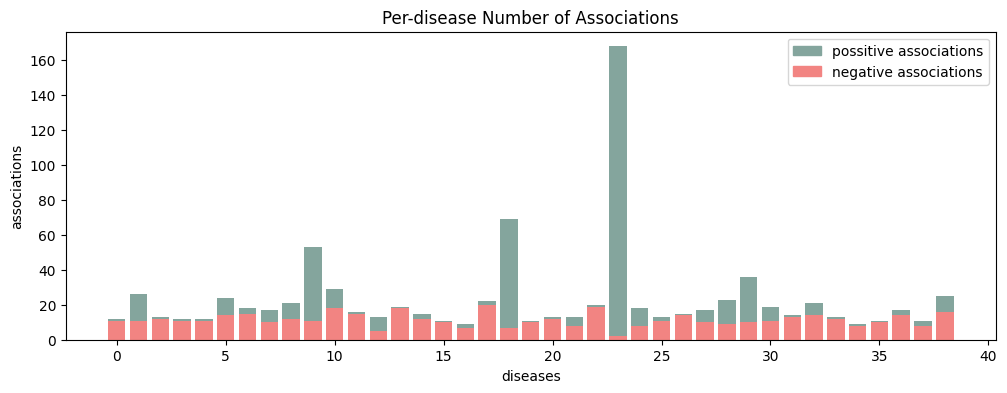

In [15]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.bar([i for i in range(len(per_disease_known_associations))], per_disease_known_associations, color=c_disease);
ax.bar([i for i in range(len(per_disease_known_neg_associations))], per_disease_known_neg_associations, color=c_disease_neg);

disease_patch = mpatches.Patch(color=c_disease, label='possitive associations')
disease_neg_patch = mpatches.Patch(color=c_disease_neg, label='negative associations')
ax.legend(handles=[disease_patch, disease_neg_patch]);

ax.set_title('Per-disease Number of Associations');
ax.set_xlabel('diseases');
ax.set_ylabel('associations');

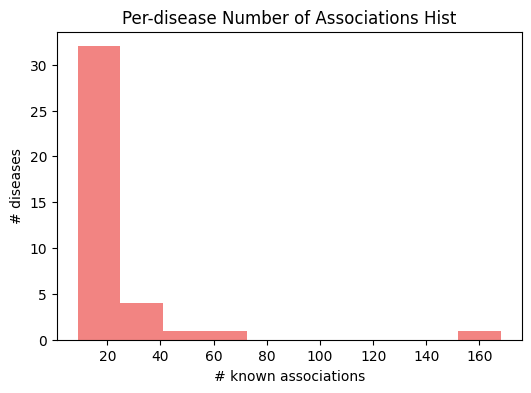

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(per_disease_known_associations, color=c_disease_neg);

ax.set_title('Per-disease Number of Associations Hist');
ax.set_xlabel('# known associations');
ax.set_ylabel('# diseases');

## Per-disease Negative Association Ratio

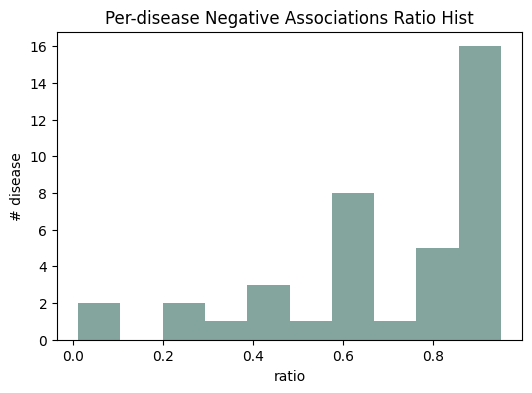

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

d_ratio = per_disease_known_neg_associations / per_disease_known_associations

ax.hist(d_ratio, color=c_disease);

ax.set_title('Per-disease Negative Associations Ratio Hist');
ax.set_xlabel('ratio');
ax.set_ylabel('# disease');

# Per Microbe Associations

In [ ]:
per_microbe_known_neg_associations = np.sum(interaction[np.sum(mask, axis=1) != 0, :] == 0, axis=1)
per_disease_known_pos_associations = np.sum(interaction[np.sum(mask, axis=1) != 0, :] == 1, axis=1)
per_microbe_known_associations = per_microbe_known_neg_associations + per_disease_known_pos_associations

In [ ]:
per_microbe_known_associations.shape

(291,)

## Per-microbe Number of Associations

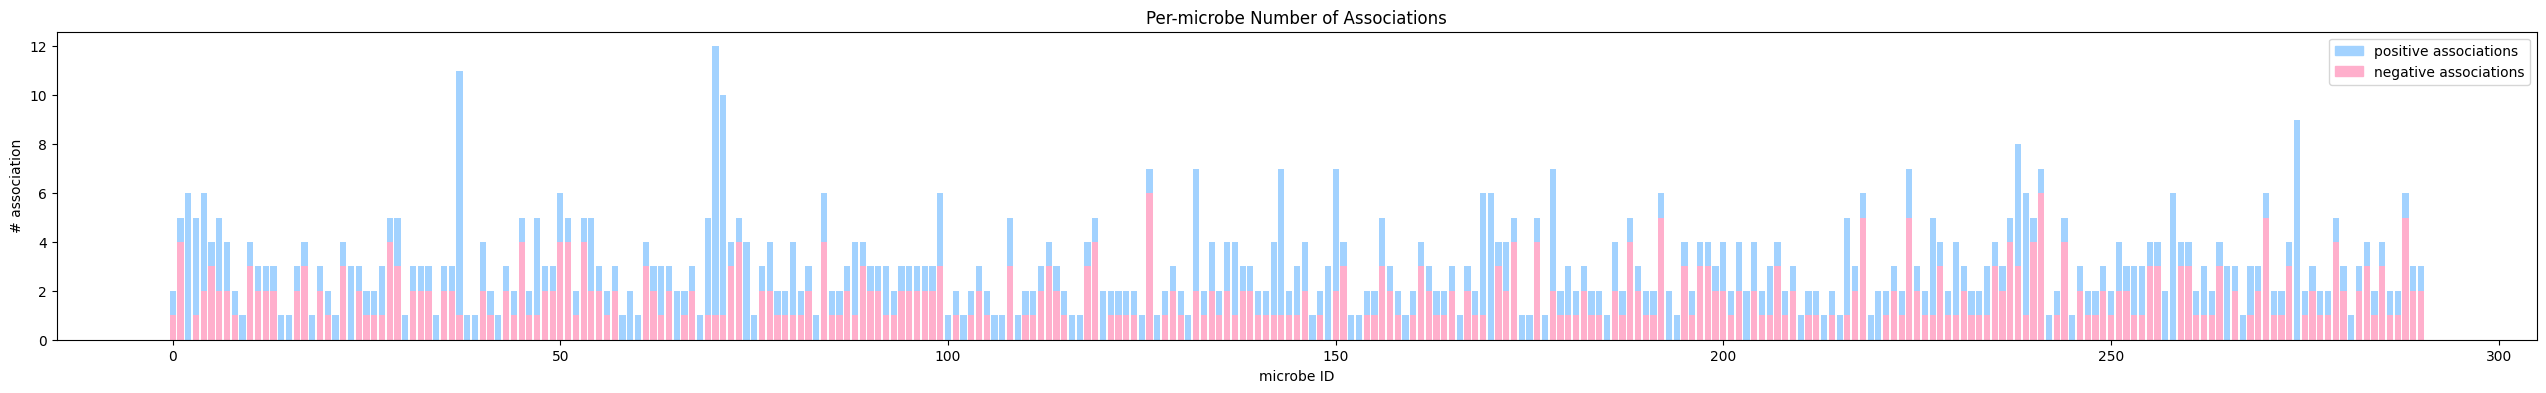

In [ ]:
fig, ax = plt.subplots(figsize=(32, 4))

ax.bar([i for i in range(len(per_microbe_known_associations))], per_microbe_known_associations, color=c_microbe);
ax.bar([i for i in range(len(per_microbe_known_neg_associations))], per_microbe_known_neg_associations, color=c_microbe_neg);

microbe_patch = mpatches.Patch(color=c_microbe, label='positive associations')
microbe_neg_patch = mpatches.Patch(color=c_microbe_neg, label='negative associations')
ax.legend(handles=[microbe_patch, microbe_neg_patch]);

ax.set_title('Per-microbe Number of Associations');
ax.set_xlabel('microbe ID');
ax.set_ylabel('# association');

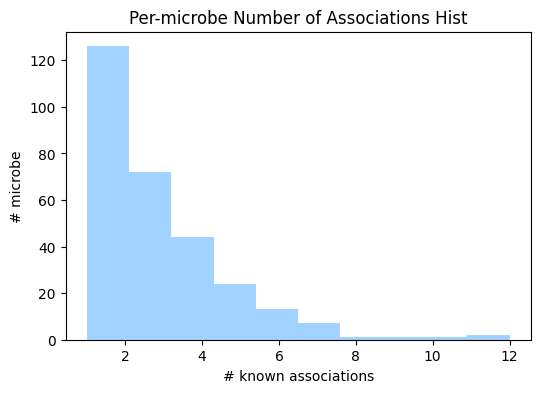

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(per_microbe_known_associations, color=c_microbe);

ax.set_title('Per-microbe Number of Associations Hist');
ax.set_xlabel('# known associations');
ax.set_ylabel('# microbe');

## Per-microbe Negative Association Ratio

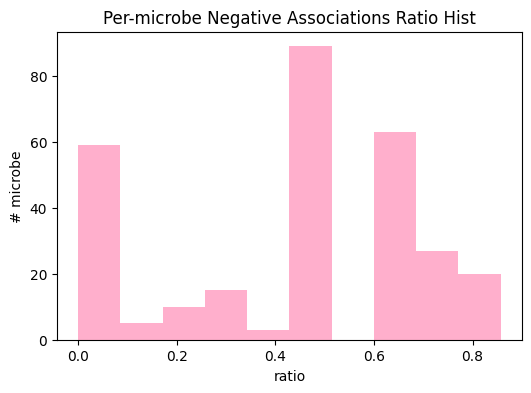

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

d_ratio = per_microbe_known_neg_associations / per_microbe_known_associations

ax.hist(d_ratio, color=c_microbe_neg);

ax.set_title('Per-microbe Negative Associations Ratio Hist');
ax.set_xlabel('ratio');
ax.set_ylabel('# microbe');